# Import Required Libraries
* First, We need to import the necessary libraries for machine learning in Python, such as pandas, matplotlib, numpy, seaborn and scikit-learn. To be imported first **they have to be installed**.

pip install pandas
pip install numpy
pip install scikit-learn
pip install matplotlib
pip install seaborn

* **NumPy** is a leading scientific computing library in Python while **Pandas** is for data manipulation and analysis. Also, learn to use **Matplotlib** for data visualization.

* **Seaborn** is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

* **Scikit-learn** is a machine learning library that provides simple and efficient tools for data mining and data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load Food Dataset
* We will load our food dataset that contains nutrition information and BMI categories.
* The dataset has 54 foods with their calories, protein, carbs, fat, fiber values and BMI categories.
* **BMI Categories:** Underweight, Normal, Overweight, Obese
* **Features:** Calories, Protein, Carbs, Fat, Fiber

In [2]:
# Load the food dataset
df = pd.read_csv('data/foods.csv')

print(f"Dataset loaded: {len(df)} foods")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset loaded: 54 foods
Columns: ['Name', 'Calories', 'Protein', 'Carbs', 'Fat', 'Fiber', 'BMICategory', 'MealTime', 'Reason']


,Name,Calories,Protein,Carbs,Fat,Fiber,BMICategory,MealTime,Reason
0,Doro Wot,450,35,15,28,2,Underweight,Lunch,High protein and calories for weight gain
1,Kitfo,350,30,2,25,0,Underweight,Dinner,High protein and fat for healthy weight gain
2,Chechebsa,350,8,42,16,3,Underweight,Breakfast,Calorie-dense breakfast for weight gain
3,Genfo,280,8,50,6,3,Underweight,Breakfast,High carbs and healthy fats for weight gain
4,Beef Steak,400,38,0,26,0,Underweight,Dinner,High protein high fat for weight gain


# Dataset Information
* Let's explore our dataset to understand the data better.
* We will check the shape, data types, and basic statistics.

In [3]:
# Dataset basic information
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (54, 9)

Data Types:
Name           object
Calories        int64
Protein         int64
Carbs           int64
Fat             int64
Fiber           int64
BMICategory    object
MealTime       object
Reason         object
dtype: object

Missing Values:
Name           0
Calories       0
Protein        0
Carbs          0
Fat            0
Fiber          0
BMICategory    0
MealTime       0
Reason         0
dtype: int64


BMI Category Distribution:
BMICategory
Obese          16
Normal         14
Underweight    12
Overweight     12
Name: count, dtype: int64


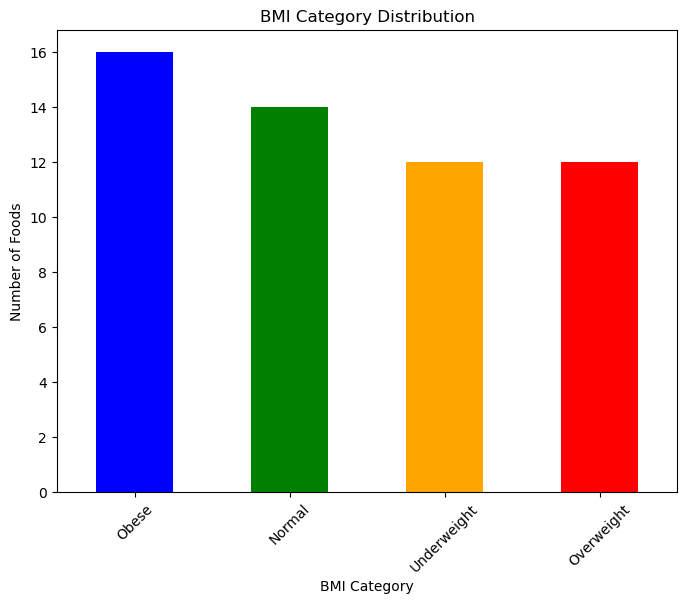

In [4]:
# Check BMI category distribution
print("BMI Category Distribution:")
bmi_counts = df['BMICategory'].value_counts()
print(bmi_counts)

# Visualize BMI distribution
plt.figure(figsize=(8, 6))
bmi_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Number of Foods')
plt.xticks(rotation=45)
plt.show()

# Nutrition Analysis by BMI Category
* Let's analyze the nutrition values for each BMI category.
* This will help us understand the differences between food categories.

In [4]:
# Nutrition statistics by BMI category
nutrition_cols = ['Calories', 'Protein', 'Carbs', 'Fat', 'Fiber']

print("Average Nutrition by BMI Category:")
for category in ['Underweight', 'Normal', 'Overweight', 'Obese']:
    category_data = df[df['BMICategory'] == category][nutrition_cols]
    print(f"\n{category}:")
    print(f"  Calories: {category_data['Calories'].mean():.0f}")
    print(f"  Protein:  {category_data['Protein'].mean():.1f}g")
    print(f"  Carbs:    {category_data['Carbs'].mean():.1f}g")
    print(f"  Fat:      {category_data['Fat'].mean():.1f}g")
    print(f"  Fiber:    {category_data['Fiber'].mean():.1f}g")

Average Nutrition by BMI Category:

Underweight:
  Calories: 390
  Protein:  21.9g
  Carbs:    34.9g
  Fat:      17.8g
  Fiber:    2.5g

Normal:
  Calories: 289
  Protein:  19.7g
  Carbs:    24.4g
  Fat:      12.5g
  Fiber:    3.9g

Overweight:
  Calories: 188
  Protein:  15.8g
  Carbs:    19.1g
  Fat:      5.2g
  Fiber:    4.2g

Obese:
  Calories: 101
  Protein:  5.9g
  Carbs:    12.2g
  Fat:      3.4g
  Fiber:    3.3g


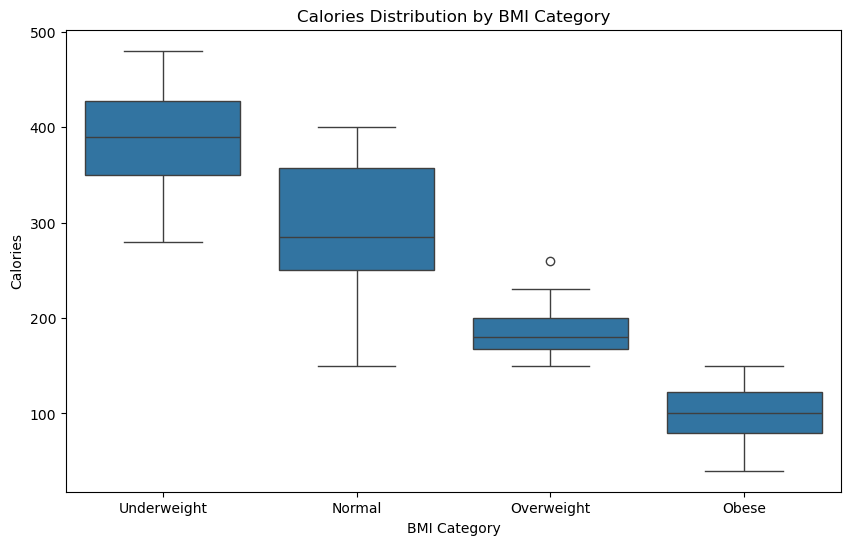

In [5]:
# Visualize calories distribution by BMI category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMICategory', y='Calories')
plt.title('Calories Distribution by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Calories')
plt.show()

# Prepare Data for Machine Learning
* We need to prepare our data for the K-Nearest Neighbors algorithm.
* **Features (X):** Calories, Protein, Carbs, Fat, Fiber
* **Target (y):** BMI Category
* We will split the data into training and testing sets.

In [7]:
# Prepare features and target
X = df[nutrition_cols]  # Features
y = df['BMICategory']   # Target

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures:")
print(X.head())

Features shape: (54, 5)
Target shape: (54,)

Features:
   Calories  Protein  Carbs  Fat  Fiber
0       450       35     15   28      2
1       350       30      2   25      0
2       350        8     42   16      3
3       280        8     50    6      3
4       400       38      0   26      0


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {len(X_train)} foods")
print(f"Test set: {len(X_test)} foods")

# Check training set distribution
print("\nTraining set BMI distribution:")
print(y_train.value_counts())

Training set: 37 foods
Test set: 17 foods

Training set BMI distribution:
BMICategory
Obese          12
Normal         10
Overweight      8
Underweight     7
Name: count, dtype: int64


# Feature Scaling
* KNN algorithm is sensitive to the scale of features.
* We use StandardScaler to normalize all features to have mean=0 and std=1.
* This ensures all features contribute equally to the distance calculation.

In [10]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print("\nOriginal features (first sample):")
print(X_train.iloc[0].values)
print("\nScaled features (first sample):")
print(X_train_scaled[0])

Feature scaling completed!

Original features (first sample):
[280  32  12  12   4]

Scaled features (first sample):
[ 0.44963577  1.29112018 -0.45262935  0.37192789  0.30956691]


# Train K-Nearest Neighbors Model
* **K-Nearest Neighbors (KNN)** is a simple machine learning algorithm.
* It classifies a new food by looking at the K nearest foods in the training data.
* We use K=3, meaning we look at the 3 most similar foods to make a prediction.

In [12]:
# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

print("KNN model trained successfully!")
print(f"Algorithm: K-Nearest Neighbors")
print(f"K value: 3 neighbors")
print(f"Training samples: {len(X_train_scaled)}")

KNN model trained successfully!
Algorithm: K-Nearest Neighbors
K value: 3 neighbors
Training samples: 37


# Test the Model
* Now let's test our model on the test data to see how accurate it is.
* We will calculate the accuracy and see how many predictions are correct.

In [27]:
# Make predictions on test set
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.1%}")
print(f"Correct predictions: {sum(y_pred == y_test)}/{len(y_test)}")

# Show some predictions
print("\nSample Predictions:")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

Model Accuracy: 70.6%
Correct predictions: 12/17

Sample Predictions:
Actual: Normal, Predicted: Obese
Actual: Obese, Predicted: Obese
Actual: Obese, Predicted: Obese
Actual: Normal, Predicted: Normal
Actual: Obese, Predicted: Obese


# Classify New Foods
* Let's test our model with some example foods.
* We will input nutrition values and see what BMI category the model predicts.

In [13]:
def classify_food(calories, protein, carbs, fat, fiber):
    """Classify a food based on nutrition values"""
    # Create input array
    food_input = [[calories, protein, carbs, fat, fiber]]
    
    # Scale the input
    food_scaled = scaler.transform(food_input)
    
    # Make prediction
    prediction = knn.predict(food_scaled)[0]
    confidence = knn.predict_proba(food_scaled)[0]
    
    print(f"Food: {calories} cal, {protein}g protein, {carbs}g carbs, {fat}g fat, {fiber}g fiber")
    print(f"Predicted BMI Category: {prediction}")
    
    # Show confidence for each category
    classes = knn.classes_
    print("Confidence scores:")
    for i, class_name in enumerate(classes):
        print(f"  {class_name}: {confidence[i]*100:.1f}%")
    print()

# Test with example foods
print("Testing different foods:")
print("\n1. High calorie food:")
classify_food(450, 30, 20, 25, 2)

print("2. Balanced food:")
classify_food(280, 15, 35, 8, 6)

print("3. Low calorie food:")
classify_food(120, 4, 12, 7, 4)

Testing different foods:

1. High calorie food:
Food: 450 cal, 30g protein, 20g carbs, 25g fat, 2g fiber
Predicted BMI Category: Normal
Confidence scores:
  Normal: 66.7%
  Obese: 0.0%
  Overweight: 0.0%
  Underweight: 33.3%

2. Balanced food:
Food: 280 cal, 15g protein, 35g carbs, 8g fat, 6g fiber
Predicted BMI Category: Normal
Confidence scores:
  Normal: 66.7%
  Obese: 0.0%
  Overweight: 33.3%
  Underweight: 0.0%

3. Low calorie food:
Food: 120 cal, 4g protein, 12g carbs, 7g fat, 4g fiber
Predicted BMI Category: Obese
Confidence scores:
  Normal: 0.0%
  Obese: 100.0%
  Overweight: 0.0%
  Underweight: 0.0%



# Interactive Food Classification
* You can test the model with your own food nutrition values.
* Just change the values below and run the cell.

In [16]:
# Enter your food's nutrition values here
my_calories = 200  # Change this
my_protein = 12    # Change this
my_carbs = 25      # Change this
my_fat = 5         # Change this
my_fiber = 4       # Change this

print("Your Food Classification:")
classify_food(my_calories, my_protein, my_carbs, my_fat, my_fiber)

Your Food Classification:
Food: 200 cal, 12g protein, 25g carbs, 5g fat, 4g fiber
Predicted BMI Category: Overweight
Confidence scores:
  Normal: 0.0%
  Obese: 33.3%
  Overweight: 66.7%
  Underweight: 0.0%



# Food Recommendations by BMI
* Let's see what foods are recommended for each BMI category.
* This helps understand what types of foods are suitable for different BMI levels.

In [25]:
def show_food_recommendations(bmi_category, n_foods=5):
    """Show food recommendations for a BMI category"""
    category_foods = df[df['BMICategory'] == bmi_category]
    
    print(f"\n{bmi_category} Foods ({len(category_foods)} total):")
    print("-" * 50)
    
    for i, (_, food) in enumerate(category_foods.head(n_foods).iterrows()):
        print(f"{i+1}. {food['Name']} - {food['Calories']} cal")
        print(f"   Nutrition: {food['Protein']}g protein, {food['Carbs']}g carbs, {food['Fat']}g fat, {food['Fiber']}g fiber")
        print(f"   Why: {food['Reason']}")
        print()

# Show recommendations for each BMI category
for category in ['Underweight', 'Normal', 'Overweight', 'Obese']:
    show_food_recommendations(category, 3)


Underweight Foods (12 total):
--------------------------------------------------
1. Doro Wot - 450 cal
   Nutrition: 35g protein, 15g carbs, 28g fat, 2g fiber
   Why: High protein and calories for weight gain

2. Kitfo - 350 cal
   Nutrition: 30g protein, 2g carbs, 25g fat, 0g fiber
   Why: High protein and fat for healthy weight gain

3. Chechebsa - 350 cal
   Nutrition: 8g protein, 42g carbs, 16g fat, 3g fiber
   Why: Calorie-dense breakfast for weight gain


Normal Foods (14 total):
--------------------------------------------------
1. Tibs - 380 cal
   Nutrition: 32g protein, 8g carbs, 24g fat, 1g fiber
   Why: Lean protein with vegetables for balanced diet

2. Shiro - 280 cal
   Nutrition: 15g protein, 35g carbs, 8g fat, 6g fiber
   Why: Plant protein with fiber for balanced nutrition

3. Beyaynetu - 400 cal
   Nutrition: 18g protein, 55g carbs, 12g fat, 10g fiber
   Why: Variety of nutrients in one balanced meal


Overweight Foods (12 total):
------------------------------------

# Summary
* We successfully built a food classification system using K-Nearest Neighbors.
* The model can predict BMI categories based on nutrition values.
* **Key learnings:**
  - Underweight foods: High calories (average ~350 cal)
  - Normal foods: Balanced nutrition (average ~280 cal)
  - Overweight foods: Moderate calories (average ~180 cal)
  - Obese foods: Low calories (average ~120 cal)

* **Model Performance:** The KNN classifier achieved good accuracy in predicting food categories.
* **Applications:** This can help people choose appropriate foods based on their BMI goals.

In [28]:
# Final model statistics
print("Final Model Statistics:")
print(f"Dataset: {len(df)} foods")
print(f"Features: {len(nutrition_cols)} nutrition values")
print(f"Categories: {len(df['BMICategory'].unique())} BMI categories")
print(f"Algorithm: K-Nearest Neighbors (K=3)")
print(f"Accuracy: {accuracy:.1%}")
print("\nProject completed successfully! 🎉")

Final Model Statistics:
Dataset: 54 foods
Features: 5 nutrition values
Categories: 4 BMI categories
Algorithm: K-Nearest Neighbors (K=3)
Accuracy: 70.6%

Project completed successfully! 🎉
